# Forest distribution under scenario SPA1

Author: Firza Riany  
Email: firza.riany@climateanalytics.org  
Date: 02.08.2021  

Aim(s) of analysis:

1. Observing the temporal distribution of various land types under SPA1 to be compared with SPA0  
2. Identify the gap between climate targets and country potentials  

Datasets:  
- Land cover allocation from IMAGE: `GLANDCOVER_30MIN.nc`
- World borders: `TM_WORLD_BORDERS-0`
- Total land area: `GAREA_30M.asc` to calculate the area of each land use type
- Scenario: `SSP1_SPA1_19I_LIRE_LB` (reference scenario without climate policy)
- Model: `IMAGE`  

Description:  
It's difficult to visually see the differences between SPA1 and SPA0. It would be better to check the differences in the allocation of each land type through the tabular data, then calculate the sequestration potential.

In [1]:
# libraries 
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regionmask
import os

In [2]:
%matplotlib inline

In [3]:
os.getcwd()

'/Users/firzariany/Documents/ikea_land_use/unstaged_scripts'

In [4]:
# source the data from box
path = "/Users/firzariany/Box/Climate Policy Team/02 - Projects/IKEA NDC 1.5° Pathways 20-22/2- Work Packages/WP3 -  LULUCF Pathways/Workflow/Data/IMAGE_SSPs/"

file = path + "SSP1s_july2021/SSP1_SPA1_19I_LIRE_LB/GLANDCOVER_30MIN.NC"

df_spa1 = (xr.open_dataset(file))

In [5]:
# global land area
ar_file = path + "GAREA_30M.asc"

area = (xr.open_rasterio(ar_file)
       .rename({"y" : "latitude", "x" : "longitude"})
        .sel(band = 1)
       )

In [6]:
# world border
b_file = path + "TM_WORLD_BORDERS-0"

regions = gpd.read_file(b_file)

In [7]:
# select land cover variable
glandcov_sp1 = df_spa1.GLANDCOVER_30MIN

In [8]:
glandcov_sp1

<xarray.DataArray 'GLANDCOVER_30MIN' (time: 27, lat: 360, lon: 720, NGLNDCOV: 5)>
[34992000 values with dtype=float32]
Coordinates:
  * NGLNDCOV  (NGLNDCOV) |S50 b'cropland                                     ...
  * lon       (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat       (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time      (time) datetime64[ns] 1970-01-01 1975-01-01 ... 2100-01-01
Attributes:
    units:      1
    long_name:  glandcover agregrated to 30 min

## Functions to calculate forest area

In [9]:
# years_to_use = ["2020-01-01", "2030-01-01", "2050-01-01", "2100-01-01"]

In [10]:
# it has different name for the band (NGLNDCOV while in 1_26 it's N)
# updating the function to get a forest area in several years
# for SSP1_19
def area_yr_2(variable, land, date):
    forest_df = variable.sel(NGLNDCOV = land, time = date)
    for_area = forest_df * area
    return for_area

In [11]:
# fun forest area per region
def area_reg(reg_name, area):
    reg = reg_name
    area_set = area.rio.set_crs(4326)
    g_reg = reg.geometry
    clipped = area_set.rio.clip(g_reg, area_set.rio.crs)
    return clipped

---
## Getting only the forest distribution

In [12]:
# fun for land_type distribution
def dist_reg_2(variable, land_type, date, reg_name):
    dist_df = variable.sel(NGLNDCOV = land_type, time = date)
    dist_df = dist_df.rio.set_crs("epsg:4326")
    reg = reg_name
    g_reg = reg.geometry
    clipped = dist_df.rio.clip(g_reg, dist_df.rio.crs)
    return clipped

---
## Temporal evolution of forest distribution
### Brazil in 2020, 2030, 2050, 2100

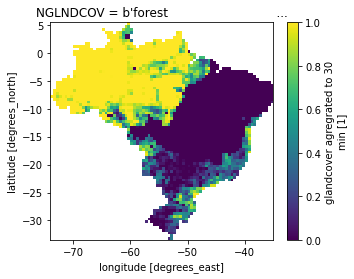

In [14]:
# 2020
br = regions[regions.ISO3 == "BRA"]

plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_sp1, land_type = b'forest                                            ',
          date = "2020-01-01", reg_name = br).plot()

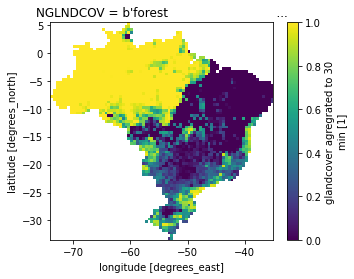

In [15]:
# 2030
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_sp1, land_type = b'forest                                            ',
          date = "2030-01-01", reg_name = br).plot()

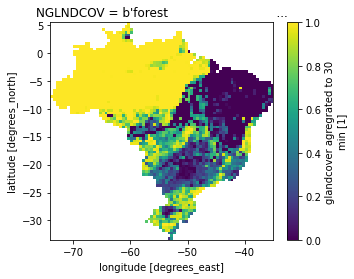

In [16]:
# 2050
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_sp1, land_type = b'forest                                            ',
          date = "2050-01-01", reg_name = br).plot()

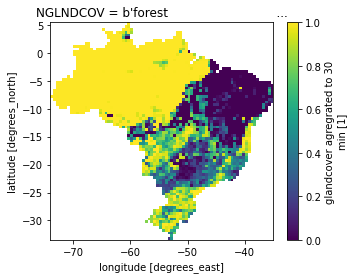

In [17]:
# 2100
plt.figure(figsize=[5,4])
dist_reg_2(variable = glandcov_sp1, land_type = b'forest                                            ',
          date = "2100-01-01", reg_name = br).plot()